In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq


#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="qwen-2.5-32b")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 30, 'total_tokens': 40, 'completion_time': 0.05, 'prompt_time': 0.003765854, 'queue_time': 0.236302042, 'total_time': 0.053765854}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-55fa21e7-d9f7-468f-bc91-441441983ae0-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})

In [4]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class State(TypedDict):
    topic: str
    title: str
    blog: str
    finalblog: str


In [7]:
# Define Nodes

def titleagent(state: State):
    """LLM call to generate title"""
    msg=llm.invoke(
        "<instruction>"
        f"You are an intelligent blog title generator. Your task is to create catchy, engaging,and relevant single title based on the {state['topic']} provided to you \n" + \
        "Ensure that the titles are concise, informative, and tailored to attract readers' attention. Aim for creativity while maintaining clarity and relevance to the topic at hand."
        "</instruction>"
        )
    return {"title": msg.content}

def blogagent(state: State):
    """LLM call to generate blog"""
    blog=llm.invoke(
        "<instruction>"
        f"You are an intelligent blog content generator. Your task is to create a blog content based on the {state['topic']} provided to you \n" + \
        "Ensure that the blog is informative, engaging, and tailored to attract readers' attention. Aim for clarity, depth, and engagement while maintaining a high level of quality and accuracy."
        "</instruction>"
        )
    return {"blog": blog.content}

def finalblogagent(state: State):
    """Combine the title and blog into a single output"""

    combined = f"Here's a title and blog about {state['topic']}!\n\n"
    combined += f"Title:\n{state['title']}\n\n"
    combined += f"Blog:\n{state['blog']}\n\n"
    return {"finalblog": combined}

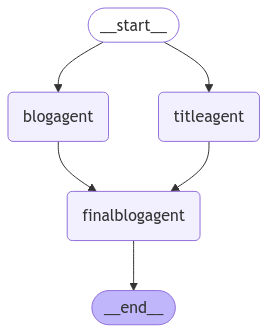

In [8]:
# Build workflow
parallel_builder = StateGraph(State)

# add nodes
parallel_builder.add_node("titleagent", titleagent)
parallel_builder.add_node("blogagent", blogagent)
parallel_builder.add_node("finalblogagent", finalblogagent)

# add edges
parallel_builder.add_edge(START, "titleagent")
parallel_builder.add_edge(START, "blogagent")
parallel_builder.add_edge("titleagent", "finalblogagent")
parallel_builder.add_edge("blogagent", "finalblogagent")
parallel_builder.add_edge("finalblogagent", END)

parallel_workflow = parallel_builder.compile()

# Show workflow
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

In [10]:
# Invoke
state = parallel_workflow.invoke({"topic": "Evaluation Metrics for LLMs"})
print(state["finalblog"])

Here's a title and blog about Evaluation Metrics for LLMs!

Title:
"Unlocking the Secrets of LLM Success: A Deep Dive into Essential Evaluation Metrics"

Blog:
### Evaluating the Efficacy of Large Language Models: A Comprehensive Guide

In the rapidly evolving landscape of artificial intelligence and machine learning, large language models (LLMs) have become central to advancing natural language processing capabilities. These models, such as BERT, GPT, and T5, have revolutionized tasks like text generation, translation, and sentiment analysis, among others. However, as technology progresses, so does the need for robust evaluation metrics to assess the performance of these models accurately. In this blog, we delve into the critical evaluation metrics used to gauge the efficacy of LLMs, providing insights that are both informative and engaging.

#### Precision and Recall: The Basics

Before diving into the more sophisticated metrics, it's essential to understand the foundational metrics 